# Gauss Quadrature

CBE 20258. Numerical and Statistical Analysis. Spring 2020.

&#169; University of Notre Dame

**Reference**: Chapters 15 and 16 in McClarren (2018). There are two copies in reserve at the library.

In [1]:
# load libraries
from scipy import integrate
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import Polygon

## Gauss Quadrature Rules

To recap, **Newton-Cotes formulas** approximate integrals by fitting the integrand with an interpolating polynomial and then integrating the polynomial exactly. In contrast, **Gauss quadrature** methods guarantees the **maximum accuracy** for a given number of points. Both Newton-Cotes and Gauss quadrature approximate integrals as a sum of function evaluations and weights:

$$\int\limits_a^b f(x)\,dx \approx \sum_{l=0}^{L}w_l f(x_l).$$

The "magic" of Gauss quadrature is selecting the weights $w_l$ and nodes (i.e., abscissas) $x_l$ to maximize accuracy. There are many different types of Gauss quadrature rules. We will focus our discussion on the **Gauss-Legendre** variety.

#### Integral Bounds Transformation

The Gauss-Legendre quadrature rule is for integrals of the form
$$\int\limits_{-1}^1 f(x)\,dx \approx \sum_{l=1}^L w_l f(x_l).$$
The integral does not need to be limited just to the range, $[-1,1]$, however. If we want to integrate $f(x)$ from $[a,b]$, we define a variable

$$x = \frac{a+b}{2} + \frac{b-a}{2}z, \qquad dx = \frac{b-a}{2} dz,$$ 


where $z \in [-1, 1]$. This makes the transformation

$$\int_a^b f(x)\,dx = \frac{b-a}{2} \int_{-1}^1 f\left(\frac{b-a}{2}z + \frac{a+b}{2}\right)\,dz.$$

#### Transformation Example

Which of the following is the correct transformation? $\int_{0}^{2} (x + x^2)dx =$ ...
1. $\int_{-1}^{1} (z + z^2)dz$
2. $\int_{-1}^{1} ((z+1) + (z+1)^2)dz$
3. $\int_{-1}^{1} ((z-1) + (z-1)^2)dz$
4. $\frac{1}{2}\int_{-1}^{1} (z + z^2)dz$
5. $\frac{1}{2}\int_{-1}^{1} ((z+1) + (z+1)^2)dz$
6. $\frac{1}{2}\int_{-1}^{1} ((z-1) + (z-1)^2)dz$
7. None of the above.

<div style="background-color: rgba(0,255,0,0.05) ; padding: 10px; border: 1px solid darkgreen;"> 
<b>Home Activity</b>: Store your answer in the Python integer <tt>ans_c_transform</tt>.
</div>

In [2]:
### BEGIN SOLUTION
ans_c_transform = 2
### END SOLUTION

In [3]:
### BEGIN HIDDEN TESTS
secret_c_transform = 2


assert type(ans_c_transform) is int, "Your solution must be an integer."

assert secret_c_transform == ans_c_transform, "Try again. Your answer is not correct"

### END HIDDEN TESTS

### Integrate a Linear Function

<div style="background-color: rgba(0,0,255,0.05) ; padding: 10px; border: 1px solid darkblue;"> 
<b>Class Activity</b>: Discuss the following questions with a partner.</div>

1. What is the minimum number of $x$ location(s) you need to evaluate $f(x) = ax + b$ to compute $\int_{-1}^{1} f(x)dx$ exactly?
2. Where do you evaluate $x$?
3. Why?

![monte_python](https://vignette.wikia.nocookie.net/montypython/images/c/c1/Bridge_of_Death_monty_python_and_the_holy_grail_591679_800_4411271399897.jpg/revision/latest?cb=20130716234623)

### Weights and Nodes

The weights, $w_l$, and abscissas, $x_l$, are chosen so that the rule is as accurate as possible with $L$ points.  

It turns out that we can pick the weights and abscissas such that the Gauss-Legendre quadrature formula is <b>exact</b> for polynomials of degree $2L-1$ or less. This should not be a complete surprise because the integral of a $2L-1$ degree polynomial is a degree $2L$ polynomial.  Such a polynomial has $2L + 1$ coefficients, only $2L$ of these depend on the original polynomial because the constant term is determined by the integration bounds.  Therefore, the integral has $2L$ degrees of freedom, the exact number of degrees of freedom we have with our $L$ weights and abscissas. We will not go into the construction of these quadrature sets, but it is important to know that they have this property.

The weights and abscissas are given for $L$ up to 8:

<table>
<tbody><tr><td>$L$</td><td>$x_l$</td><td>$w_l$</td></tr></tbody>
<tbody><tr><td>1</td><td>0</td><td>2.0000000000000000000000000</td></tr></tbody>
<tbody><tr><td>2</td><td>±0.5773502691896257645091488</td><td>1.0000000000000000000000000</td></tr></tbody><p></p><tbody><tr><td rowspan="2">3</td><td>0</td><td>0.8888888888888888888888889</td></tr><tr><td>±0.7745966692414833770358531</td><td>0.5555555555555555555555556</td></tr></tbody><p></p><tbody><tr><td rowspan="2">4</td><td>±0.3399810435848562648026658</td><td>0.6521451548625461426269361</td></tr><tr><td>±0.8611363115940525752239465</td><td>0.3478548451374538573730639</td></tr></tbody><p></p><tbody><tr><td rowspan="3">5</td><td>0</td><td>0.5688888888888888888888889</td></tr><tr><td>±0.5384693101056830910363144</td><td>0.4786286704993664680412915</td></tr><tr><td>±0.9061798459386639927976269</td><td>0.2369268850561890875142640</td></tr></tbody><p></p><tbody><tr><td rowspan="3">6</td><td>±0.2386191860831969086305017</td><td>0.4679139345726910473898703</td></tr><tr><td>±0.6612093864662645136613996</td><td>0.3607615730481386075698335</td></tr><tr><td>±0.9324695142031520278123016</td><td>0.1713244923791703450402961</td></tr></tbody><p></p><tbody><tr><td rowspan="4">7</td><td>0</td><td>0.4179591836734693877551020</td></tr><tr><td>±0.4058451513773971669066064</td><td>0.3818300505051189449503698</td></tr><tr><td>±0.7415311855993944398638648</td><td>0.2797053914892766679014678</td></tr><tr><td>±0.9491079123427585245261897</td><td>0.1294849661688696932706114</td></tr></tbody><p></p><tbody><tr><td rowspan="4">8</td><td>±0.1834346424956498049394761</td><td>0.3626837833783619829651504</td></tr><tr><td>±0.5255324099163289858177390</td><td>0.3137066458778872873379622</td></tr><tr><td>±0.7966664774136267395915539</td><td>0.2223810344533744705443560</td></tr><tr><td>±0.9602898564975362316835609</td><td>0.1012285362903762591525314</td></tr></tbody>
</table>

Notice that the odd $L$ sets all have $x=0$ in the set.  Also, the sum of the $w_l$ adds up to 2 because the range of integration has a length of 2. 

#### Where did these points come from? (optional)

One way to derive the Gauss-Legendre quadrature rules is by looking at the integral generic monomials of degree 0 up to $2L-1$ and setting each equal to the $L$ point Gauss-Legendre quadrature rule:
$$ \int\limits_{-1}^{1} dx\, a_0 x^0 =  a_0\sum_{l=0}^L w_l x_l^0,$$
$$ \int\limits_{-1}^{1} dx\, a_1 x^1 = a_1\sum_{l=0}^L w_l x_l^1,$$
and continuing until
$$ \int\limits_{-1}^{1} dx\, a_{2L-1} x^{2L-1} = a_{2L-1}\sum_{l=0}^L w_l x_l^{2L-1}.$$
Notice that the $a_i$ constants cancel out of each equation so they do not matter. This system is $2L$ equations with $L$ weights, $w_l$, and $L$ abscissas, $x_l$. We could solve these equations to get the weights and abscissas, though this is not how it is done in practice generally---this is accomplished by using the theory of orthogonal polynomials.

### Code for Gauss-Legendre Quadrature

We will now write a function that will compute the integral of a function from $[-1,1]$ using these quadrature rules. For values of $L$ beyond 8, we will use a NumPy function that generates the points and weights. The NumPy documentation asserts that the rules for $L>100$ have not been tested and may be inaccurate.

In [4]:
def GLQuad(f, L=8,dataReturn = False):
    """Compute the Gauss-Legendre Quadrature estimate 
    of the integral of f(x) from -1 to 1
    Inputs:
    f:   name of function to integrate
    L:   Order of integration rule (8 or less)
    
    Returns:
    G-L Quadrature estimate"""
    assert(L>=1)
    if (L==1):
        weights = np.ones(1)*2
        xs = np.array([0])
    elif (L==2):
        weights = np.ones(2)
        xs = np.array([-np.sqrt(1.0/3.0),np.sqrt(1.0/3.0)])
    elif (L==3):
        weights = np.array([0.8888888888888888888888889,
                            0.5555555555555555555555556,
                            0.5555555555555555555555556])
        xs = np.array([0.0,-0.7745966692414833770358531,
                       0.7745966692414833770358531])
    elif (L==4):
        weights = np.array([0.6521451548625461426269361,0.6521451548625461426269361,
                            0.3478548451374538573730639,0.3478548451374538573730639])
        xs = np.array([-0.3399810435848562648026658, 0.3399810435848562648026658,
                       -0.8611363115940525752239465, 0.8611363115940525752239465])
    elif (L==5):
        weights = np.array([0.5688888888888888888888889,
                            0.4786286704993664680412915,0.4786286704993664680412915,
                            0.2369268850561890875142640,0.2369268850561890875142640])
        xs = np.array([0.0,-0.5384693101056830910363144,0.5384693101056830910363144,
                       -0.9061798459386639927976269,0.9061798459386639927976269])
    elif (L==6):
        weights = np.array([0.4679139345726910473898703,0.4679139345726910473898703,
                            0.3607615730481386075698335,0.3607615730481386075698335,
                            0.1713244923791703450402961,0.1713244923791703450402961])
        xs = np.array([-0.2386191860831969086305017, 0.2386191860831969086305017,
                       -0.6612093864662645136613996, 0.6612093864662645136613996,
                       -0.9324695142031520278123016, 0.9324695142031520278123016])
    elif (L==7):
        weights = np.array([0.4179591836734693877551020,
                            0.3818300505051189449503698,0.3818300505051189449503698,
                            0.2797053914892766679014678,0.2797053914892766679014678,
                            0.1294849661688696932706114,0.1294849661688696932706114])
        xs = np.array([0.0,-0.4058451513773971669066064,0.4058451513773971669066064,
                       -0.7415311855993944398638648,0.7415311855993944398638648,
                       -0.9491079123427585245261897,0.9491079123427585245261897])
    elif (L==8):
        weights = np.array([0.3626837833783619829651504,0.3626837833783619829651504,
                            0.3137066458778872873379622,0.3137066458778872873379622,
                            0.2223810344533744705443560,0.2223810344533744705443560,
                            0.1012285362903762591525314,0.1012285362903762591525314])
        xs = np.array([-0.1834346424956498049394761, 0.1834346424956498049394761,
                       -0.5255324099163289858177390, 0.5255324099163289858177390,
                       -0.7966664774136267395915539, 0.7966664774136267395915539,
                       -0.9602898564975362316835609, 0.9602898564975362316835609])
    else: #use numpy's function
        xs, weights = np.polynomial.legendre.leggauss(L)
    
    quad_estimate = np.sum(weights*f(xs))
    if (dataReturn):
        return quad_estimate, weights, xs
    else:
        return quad_estimate

### Visualize Quadrature Weights

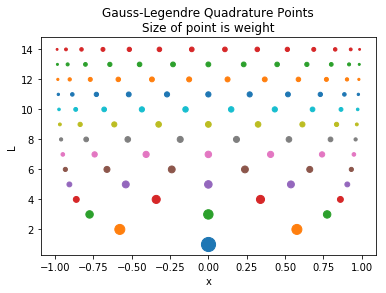

In [42]:
L = np.arange(1,15)
f = lambda x: x
for l in L:
    quad_est, weights, xs = GLQuad(f,l,dataReturn=True)
    levels = weights*0 + l
    plt.scatter(xs, levels, s=weights*100)
plt.xlabel("x")
plt.ylabel("L")
plt.title("Gauss-Legendre Quadrature Points\nSize of point is weight")
plt.show()

Each *row* in the plot above corresponds to a different $L$ value. The rows are colored to guide your eyes. The center of each dot shows the node location. The size of the circle indicates the weight for each node.

<div style="background-color: rgba(0,255,0,0.05) ; padding: 10px; border: 1px solid darkgreen;"> 
<b>Home Activity</b>: Write a few sentences to describe the two trends in the plot above.
</div>

**Home Activity Discussion**:

### Polynomial Example

As a simple demonstration of the Gauss-Legendre quadrature, let's show that it integrates polynomials of degree $2L-1$ exactly.  Consider the integral
$$\int\limits_{-1}^1 (x+1)^{2L-1}\,dx = \frac{2^{2 L-1}}{L}.$$

<div style="background-color: rgba(0,0,255,0.05) ; padding: 10px; border: 1px solid darkblue;"> 
<b>Class Activity</b>: Find a partner. Flip an imaginary coin to decide who is partner "A". First, partner "A" explains the code below. Then partner "B" explains the output. Why does this example show the power of Gauss-Legendre quadrature?
</div>

In [5]:
L = np.arange(1,12)
for l in L:
    
    # Create f
    f = lambda x: (x+1)**(2*l-1)
    
    # Evaluate exact (analytic) solution
    integral = 2**(2*l - 1)/l
    
    # Evaluate quadrature rule
    GLintegral = GLQuad(f,l)
    
    # Print results
    print("\nL =", l,"\t Estimate is",GLintegral,
          "Exact value is",integral, 
          "\nAbs. Relative Error is", np.abs(GLintegral-integral)/integral)


L = 1 	 Estimate is 2.0 Exact value is 2.0 
Abs. Relative Error is 0.0

L = 2 	 Estimate is 3.9999999999999996 Exact value is 4.0 
Abs. Relative Error is 1.1102230246251565e-16

L = 3 	 Estimate is 10.666666666666668 Exact value is 10.666666666666666 
Abs. Relative Error is 1.6653345369377348e-16

L = 4 	 Estimate is 31.99999999999999 Exact value is 32.0 
Abs. Relative Error is 3.3306690738754696e-16

L = 5 	 Estimate is 102.39999999999995 Exact value is 102.4 
Abs. Relative Error is 5.551115123125783e-16

L = 6 	 Estimate is 341.33333333333337 Exact value is 341.3333333333333 
Abs. Relative Error is 1.6653345369377348e-16

L = 7 	 Estimate is 1170.2857142857135 Exact value is 1170.2857142857142 
Abs. Relative Error is 5.828670879282072e-16

L = 8 	 Estimate is 4096.000000000003 Exact value is 4096.0 
Abs. Relative Error is 6.661338147750939e-16

L = 9 	 Estimate is 14563.555555555577 Exact value is 14563.555555555555 
Abs. Relative Error is 1.4988010832439613e-15

L = 10 	 Estimate i

### Sine Example Revisited

Let's see how it performs on the sine example, which is not polynomial:
$$\int_{0}^\pi \sin(x)\,dx = 2$$

Before proceeding, we need to transform (scale) the bounds. Here is a general function:

In [6]:
def generalGL(f,a,b,L):
    """Compute the Gauss-Legendre Quadrature estimate 
    of the integral of f(x) from a to b
    Inputs:
    f:   name of function to integrate
    a:   lower bound of integral
    b:   upper bound of integral
    L:   Order of integration rule (8 or less)
    Returns:
    G-L Quadrature estimate"""
    assert(L>=1)
    #define a re-scaled f
    f_rescaled = lambda  z: f(0.5*(b-a)*z + 0.5*(a+b))
    integral = GLQuad(f_rescaled,L)
    return integral*(b-a)*0.5

We can now proceed with the example.

L = 1 Estimate is 3.141592653589793 Exact value is 2
L = 2 Estimate is 1.9358195746511373 Exact value is 2
L = 3 Estimate is 2.0013889136077436 Exact value is 2
L = 4 Estimate is 1.999984228457722 Exact value is 2
L = 5 Estimate is 2.000000110284472 Exact value is 2
L = 6 Estimate is 1.9999999994772704 Exact value is 2
L = 7 Estimate is 2.0000000000017906 Exact value is 2
L = 8 Estimate is 1.9999999999999951 Exact value is 2
L = 9 Estimate is 1.9999999999999998 Exact value is 2
L = 10 Estimate is 2.0000000000000004 Exact value is 2
L = 11 Estimate is 2.0000000000000013 Exact value is 2
L = 12 Estimate is 1.9999999999999987 Exact value is 2
L = 13 Estimate is 1.9999999999999998 Exact value is 2
L = 14 Estimate is 1.999999999999999 Exact value is 2


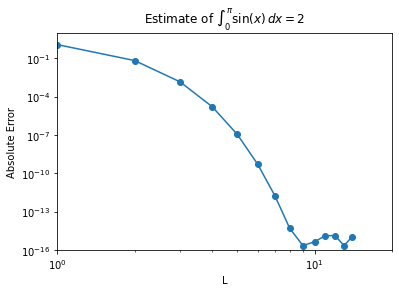

In [7]:
L = np.arange(1,15)
errors = np.zeros(L.size)
f = lambda x: np.sin(x)
integral = 2
for l in L:
    GLintegral = generalGL(f,0,np.pi,l)
    errors[l-1] = np.fabs(GLintegral-integral)
    print("L =",l,"Estimate is",GLintegral,"Exact value is",integral)
plt.loglog(L,errors,'o-')
plt.xlabel("L")
plt.ylabel("Absolute Error")
plt.title("Estimate of $\int_{0}^\pi \sin(x)\,dx = 2$")
plt.axis([1,20,10**-16,10**1])
plt.show()

Notice that we get to machine-precision by evaluating the integral at only 8 points!

This exponential convergence will only be obtained on smooth solutions without singularities in the function or its derivatives.

### A More Complicated Example

Consider:
$$ \int\limits_0^1 4 \sqrt{1-x^2}\,dx = \pi.$$
This integral has a singularity in its derivative at $x=1$. Gauss-Legendre quadrature will not have exponential convergence on this function.

L = 1 Estimate is 3.4641016151377544 Exact value is 3.141592653589793
L = 2 Estimate is 3.184452077509094 Exact value is 3.141592653589793
L = 3 Estimate is 3.156072695039818 Exact value is 3.141592653589793
L = 4 Estimate is 3.1482294686216954 Exact value is 3.141592653589793
L = 5 Estimate is 3.1451817756693496 Exact value is 3.141592653589793
L = 6 Estimate is 3.1437514508015596 Exact value is 3.141592653589793
L = 7 Estimate is 3.1429916780932854 Exact value is 3.141592653589793
L = 8 Estimate is 3.1425508648538196 Exact value is 3.141592653589793
L = 9 Estimate is 3.1422775824170497 Exact value is 3.141592653589793
L = 10 Estimate is 3.1420991700052934 Exact value is 3.141592653589793
L = 11 Estimate is 3.1419777569660723 Exact value is 3.141592653589793
L = 12 Estimate is 3.141892268737024 Exact value is 3.141592653589793
L = 13 Estimate is 3.141830335674392 Exact value is 3.141592653589793
L = 14 Estimate is 3.1417843690029263 Exact value is 3.141592653589793
L = 15 Estimate is 

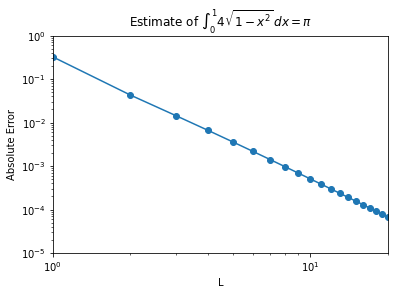

Slope of line from L = 8 to 11 is -2.848973886563485


In [8]:
L = np.arange(1,40)
errors = np.zeros(L.size)
f = lambda x: 4.0*np.sqrt(1-x**2)
integral = np.pi
for l in L:
    GLintegral = generalGL(f,0,1,l)
    errors[l-1] = np.fabs(GLintegral-integral)
    print("L =",l,"Estimate is",GLintegral,"Exact value is",integral)
plt.loglog(L,errors,'o-')
plt.xlabel("L")
plt.ylabel("Absolute Error")
plt.title("Estimate of $ \int_0^1 4\sqrt{1-x^2} \, dx = \pi$")
plt.axis([1,20,10**-5,10**0])
plt.show()
slope = (np.log(errors[-1]) - np.log(errors[0]))/(np.log(L[-1]) - np.log(L[0]) )
print("Slope of line from L = 8 to 11 is",slope)

There is a big difference between exponential convergence we saw in the integral of the sine function and the polynomial convergence in this problem. Even at a high rate of convergence (order 2.8), the error converges slowly in that we are still only accurate to 3 digits at $L=13.$